### This jupyter notebook is to calculate the dihedral angles for the ordered parameter O-C-C-C (Coordinates are in data.RoggeUiO-66 for rigid framework)
I want to calculate the dihedral angles for the NVT MD empty flexible MOF for O-C-C-C (type 6). There are 8 such type of dihedrals per linker and Thus 8$\times$192 = 1536 dihedrals



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ase
from ase import Atoms
from ase.io import read, write
import numpy as np
import ase.io.lammpsrun

Path directory for empty flexible UiO-66 framework: /bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/0loading-emptyUiO-66

First read "data.RoggeUiO66" file to count how many number of dihedrals of type 6 are there with the atom numbers and save their coordinates in a list
To form type 6 dihedral, framework atom numbers are  '2': C2, '1':C1, '3':Cca,'6':Oca

In [3]:
fr = read('/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/0loading-emptyUiO-66/data.RoggeUiO66', format='lammps-data')
dihedral_big_list=[]
with open('/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/0loading-emptyUiO-66/data.RoggeUiO66','r') as f:  ## To find dihedral angles for rigid UiO-66
    data = f.readlines()[15777:23457]
    print("Total number of dihedrals: ",len(data))
    count = 0
    dihedral_count = 0 
    for lines in data:
        l_split = lines.split()
        if l_split[1] == '6':
            dihedral_big_list.append([int(int(l_split[2])-1), int(int(l_split[3])-1), int(int(l_split[4])-1), int(int(l_split[5])-1)]) # indices of atoms to find dihedral starting from 0
            dih = fr.get_dihedral(int(int(l_split[2])-1), int(int(l_split[3])-1), int(int(l_split[4])-1), int(int(l_split[5])-1))  # -1 since lammps starts from 1
#             print(dih)
            count+=1
    print('Total number of dihedrals of type 6: ',count)
#     print(dihedral_big_list)
#     print(dih)
   
            
        
        

Total number of dihedrals:  7680
Total number of dihedrals of type 6:  1536


#### Now in order to do get dihedral angles from the dump lammps file taking into account the periodic boundary condition, convert dump.lammpstrj to XDATCAR file and sort the atom indices in increasing order using sump2xdatcar-sort.py script and then use ase .get_dihedral() to get the dihedral angles

Use command python dump2xdatcar-sort.py dumpFramework.production.lammpstrj XDATCAR

In [4]:
global_dih_zero = []
global_dih_7_IPA = []
global_dih_7_acetone = []
global_dih_23_N2 = []
for j in range(0,21):
    a0=read('/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/0loading-emptyUiO-66/XDATCAR',index=j)
    a7=read('/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/7loadedIPA-UiO-66/dump2xdatcar/XDATCAR',index=j)
    a7_acetone=read('/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/7loadedacetone-UiO-66/dump2xdatcar/XDATCAR',index=j)
    a23_N2=read('/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/23loaded_N2_Rogge-UiO-66/dump2xdatcar/XDATCAR',index=j)
    for i in range(len(dihedral_big_list)):
        b=list(dihedral_big_list[i])
        c0 = a0.get_dihedral(*b)
        c7 = a7.get_dihedral(*b)
        c7_acetone=a7_acetone.get_dihedral(*b)
        c23_N2 = a23_N2.get_dihedral(*b)
        global_dih_zero += [c0]
        global_dih_7_IPA += [c7]
        global_dih_7_acetone+=[c7_acetone]
        global_dih_23_N2+=[c23_N2]
#         print(a.get_dihedral(*b))
    print(f'{j+1} snapshot dihedral angles calculated.... Going to snapshot {j+2}')
    
    
# for j in range(0,20):
#     a=read('/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/23loaded_N2_Rogge-UiO-66/dump2xdatcar/XDATCAR',index=j)
#     a.get_positions()
#     for i in range(len(dihedral_big_list)):
#         b=list(dihedral_big_list[i])
#         c = a.get_dihedral(*b)
#         print(a.get_dihedral(*b))
#     print(f'{j+1} snapshot dihedral angles calculated.... Going to snapshot {j+2}')



# global_dih_7 = []
# for j in range(0,21):
#     a=read('/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/7loadedIPA-UiO-66/dump2xdatcar/XDATCAR',index=j)
#     a.get_positions()
#     for i in range(len(dihedral_big_list)):
#         b=list(dihedral_big_list[i])
#         c = a.get_dihedral(*b)
#         global_dih_7 += [c]
# #         print(a.get_dihedral(*b))
#     print(f'{j+1} snapshot dihedral angles calculated.... Going to snapshot {j+2}')


    

1 snapshot dihedral angles calculated.... Going to snapshot 2
2 snapshot dihedral angles calculated.... Going to snapshot 3
3 snapshot dihedral angles calculated.... Going to snapshot 4
4 snapshot dihedral angles calculated.... Going to snapshot 5
5 snapshot dihedral angles calculated.... Going to snapshot 6
6 snapshot dihedral angles calculated.... Going to snapshot 7
7 snapshot dihedral angles calculated.... Going to snapshot 8
8 snapshot dihedral angles calculated.... Going to snapshot 9
9 snapshot dihedral angles calculated.... Going to snapshot 10
10 snapshot dihedral angles calculated.... Going to snapshot 11
11 snapshot dihedral angles calculated.... Going to snapshot 12
12 snapshot dihedral angles calculated.... Going to snapshot 13
13 snapshot dihedral angles calculated.... Going to snapshot 14
14 snapshot dihedral angles calculated.... Going to snapshot 15
15 snapshot dihedral angles calculated.... Going to snapshot 16
16 snapshot dihedral angles calculated.... Going to snaps

0


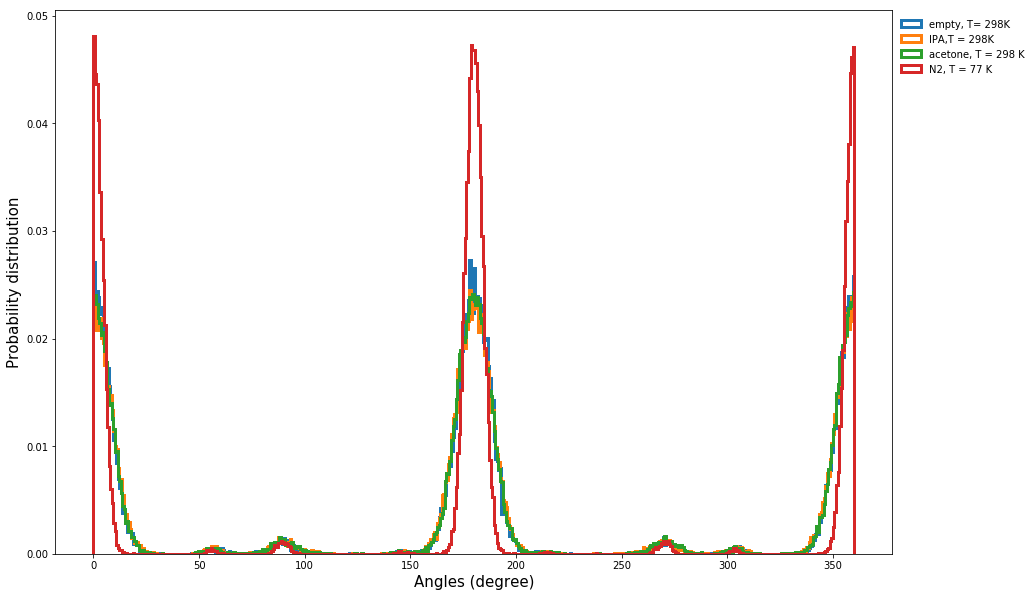

In [13]:
plt.figure(figsize=(15,10))
bins=500
plt.hist(global_dih_zero,bins=bins,histtype='step', linewidth=3,label='empty, T= 298K',density=True)
plt.hist(global_dih_7_IPA,bins=bins,histtype='step', linewidth=3,label='IPA,T = 298K',density=True)
plt.hist(global_dih_7_acetone,bins=bins,histtype='step', linewidth=3,label='acetone, T = 298 K',density=True)
plt.hist(global_dih_23_N2,bins=bins,histtype='step', linewidth=3,label='N2, T = 77 K',density=True)
plt.legend(frameon=False,bbox_to_anchor=(1,1))
plt.ylabel('Probability distribution',size=15)
plt.xlabel('Angles (degree)',size=15)
# ?plt.hist()
print(len(global_dih_23_N2)-(1536*21))

## What do we learn from this?

* For empty flexible, 7loaded IPA and 7 loaded acetone, there are very little differences in the distribution plots. 
* For empty flexible UiO-66, there is higher distribution of angles of 0, 180 and 360
* For 7 loaded acetone flexible MOF, there is higher distribution of angles of 0, 180 and 360 than IPA but lesser distribution of angles of 0, 180 and 360 than empty flexible UiO-66. This could be due to smaller size of acetone than IPA
* For 7 loaded IPA flexible MOF, The angle distribution for 0, 180 and 360 is lesser than both empty and 7 loaded acetone. This could be due to larger size of IPA molecule which interacts more with the linker.



In [11]:
## Just for testing: 0 - 1 - 2 - 3 : Dihedral is 35.3
ff= read('/ihome/kjohnson/pbs13/Flexible_bgfs/0Loading/NVT-MD/test.xyz')
fr = read('/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/0loading-emptyUiO-66/data.RoggeUiO66', format='lammps-data')
# with open('/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/0loading-emptyUiO-66/data.RoggeUiO66','r') as f:  ## To find dihedral angles for rigid UiO-66



array([4, 2, 6, ..., 9, 9, 9])

In [1]:
fr.get_chemical_symbols()

NameError: name 'fr' is not defined

In [89]:
symb = fr.get_chemical_symbols()
# print(symb)
symbBe = [x for x in symb if x == 'Be']
symbHe = [x for x in symb if x == 'He']
symbC = [x for x in symb if x == 'C']
symbLi = [x for x in symb if x == 'Li']
symbH = [x for x in symb if x == 'H']
symbN = [x for x in symb if x == 'N']
symbO = [x for x in symb if x == 'O']
symbF = [x for x in symb if x == 'F']
symbB = [x for x in symb if x == 'B']

print('Be He C Li H N O F B')
print(len(symbBe), len(symbHe), len(symbC), len(symbLi), len(symbH), len(symbN), len(symbO), len(symbF), len(symbB))


Be He C Li H N O F B
768 768 768 384 384 128 128 192 128


In [2]:
indices=[0,1,2]
test=read('/ihome/kjohnson/pbs13/FlexibleFramework-resultanalysis/Angles/test-angles.xyz')
test.get_angle(*indices)

134.31988619611946